# Notebook objective:
- To predict whether the image of an emoji is showing happiness or sadness using the 'Happy or sad' dataset

# Contents:
1. Import packages
2. Get data and view it
3. Turn input data into right format for model training
4. Get model from previous project and train model
5. Plot performance metrics
6. Predict 10 images

# 1. Import packages

In [19]:
import tensorflow as tf
print("Tensorflow version is", tf.__version__)
import pandas as pd
print("pandas version is", pd.__version__)
import numpy as np
print("numpy version is", np.__version__)
import scipy
print("scipy version is", scipy.__version__)
import PIL
print("PIL version is", PIL.__version__)
import tensorflow_datasets as tfds
print("tensorflow_datasets version is", tfds.__version__)

import os
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow import keras
import zipfile

Tensorflow version is 2.7.0
pandas version is 1.3.4
numpy version is 1.21.4
scipy version is 1.7.3
PIL version is 8.4.0
tensorflow_datasets version is 4.4.0


# 2. Get data and view it

In [6]:
# !wget --no-check-certificate \
#     "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip"

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2022-04-07 10:47:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: 'happy-or-sad.zip'

happy-or-sad.zip    100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2022-04-07 10:47:06 (198 MB/s) - 'happy-or-sad.zip' saved [2670333/2670333]



In [12]:
# zip_ref = zipfile.ZipFile("/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/happy-or-sad.zip", 'r')
# zip_ref.extractall("/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/h-or-s")
# zip_ref.close()

# 3. Turn input data into right format for model training

In [13]:
training_data = ImageDataGenerator(rescale=1/255
                                   ).flow_from_directory(directory="/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/h-or-s",
                                                         target_size=(150,150),
                                                         batch_size=10,
                                                         class_mode='binary'                                                         )

Found 80 images belonging to 2 classes.


# 4. Get model from previous project and train model

In [14]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

2022-04-07 10:56:12.984110: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-07 10:56:12.984167: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-8-v2): /proc/driver/nvidia/version does not exist
2022-04-07 10:56:12.985123: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print("\nReached 99.5% accuracy so stopping training")
            self.model.stop_training = True

callback = myCallback()

In [17]:
history= model.fit(training_data,
                   epochs=15,
                   verbose=1,
                   callbacks=[callback])

Epoch 1/15
8/8 [==============================] - 1s 40ms/step - loss: 1.1326 - accuracy: 0.5500
Epoch 2/15
8/8 [==============================] - 0s 37ms/step - loss: 0.6698 - accuracy: 0.5250
Epoch 3/15
8/8 [==============================] - 0s 42ms/step - loss: 0.5335 - accuracy: 0.8375
Epoch 4/15
8/8 [==============================] - 0s 35ms/step - loss: 0.2862 - accuracy: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 51ms/step - loss: 0.1959 - accuracy: 0.9250
Epoch 6/15
8/8 [==============================] - 0s 41ms/step - loss: 0.1182 - accuracy: 0.9500
Epoch 7/15
8/8 [==============================] - 0s 36ms/step - loss: 0.1225 - accuracy: 0.9500
Epoch 8/15
8/8 [==============================] - 0s 35ms/step - loss: 0.0811 - accuracy: 0.9625
Epoch 9/15
8/8 [==============================] - 0s 35ms/step - loss: 0.1349 - accuracy: 0.9250
Epoch 10/15
8/8 [==============================] - 0s 42ms/step - loss: 0.0928 - accuracy: 0.9500
Epoch 11/15
8/8 [============

# 5. Plot performance metrics

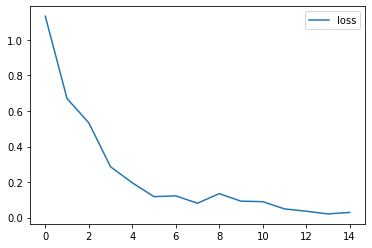

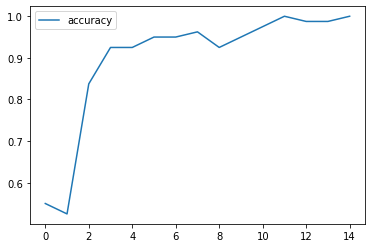

In [22]:
plt.figure()
plt.plot(history.history['loss'], label= 'loss' )
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label= 'accuracy' )
plt.legend()

# 6. Predict 10 images

(150, 150, 3)
(150, 150, 3)


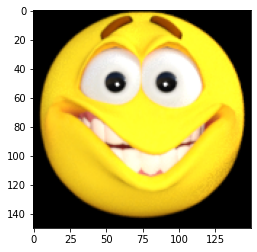

(1, 150, 150, 3)
tf.Tensor([[8.310874e-12]], shape=(1, 1), dtype=float32)
happy face


In [32]:
image_path = '/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/h-or-s/happy/happy2-15.png'
img_PIL = image.load_img(image_path, target_size=(150,150))
img_arr = image.img_to_array(img_PIL); print(img_arr.shape)
img_disp = tf.keras.utils.array_to_img(img_arr); print(img_arr.shape)
img_res = img_arr / 255                           # REMEMBER TO RESCALE, OTHERWISE YOU'LL ALWAYS PREDICT 1s

plt.imshow(img_res)
plt.show()

img_ten = np.expand_dims(img_res, axis=0); print(img_ten.shape)         # model wants a 4D tensor
pred_idx = model(img_ten); print(pred_idx)

if pred_idx > 0.5:
    print('sad face')
else:
    print('happy face')